# Covid-19 Prediction Model Project

# Introduction

**Purpose of Project**

In this hackathon, we want you to build machine learning models to predict COVID-19 infections from symptoms. It has several applications – for example, triaging patients to be attended by a doctor or nurse, recommending self-isolation through contact tracing apps, etc.

**Problem Statement**

This is a classifier problem as we want to either:
1. Predict the test result from our features
2. Predict the likihood of a positive result from our features

We might also want to consider who is at greater risk. For example,
* Risk of complications is more likely in over 60s
* A shortness of breath might be a more worrying symptom than sore throat

## Libraries
As always, we'll start by importing the necessary libraries.

In [71]:
# It's good practice to add comments to explain your code 
import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt

In [26]:
# Add your code here
data = pd.read_csv('data/corona_tested_individuals_ver_006.english.csv', dtype={'age_60_and_above': str})
data['test_date'] = pd.to_datetime(data['test_date'] )
data.head()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020-04-30,0.0,0.0,0.0,0.0,0.0,negative,NaN,female,Other
1,2020-04-30,1.0,0.0,0.0,0.0,0.0,negative,NaN,female,Other
2,2020-04-30,0.0,1.0,0.0,0.0,0.0,negative,NaN,male,Other
3,2020-04-30,1.0,0.0,0.0,0.0,0.0,negative,NaN,female,Other
4,2020-04-30,1.0,0.0,0.0,0.0,0.0,negative,NaN,male,Other


**Question 1**

Descibe the dataset

- There are 278,848 observations

In [30]:
# data.info()

In [29]:
# data.isna().sum()

## Observations

| Columns            | dtype    | Null Count | Thoughts |
|--------------------|----------|------------|----------|
| test_date          |  datetime|           0| We need to look at the trending over time and if that effects result|
| cough              |   float  |         252| |
| fever              |    float |         252| |
| sore_throat        |    float |           1| |
| shortness_of_breath|  float   |           1| |
| head_ache          |   float  |           1| |
| corona_result      |   object |           0| we have 93% negatives so need to be careful here |
| age_60_and_above   | object   |      127320| we could look to remove this feature in the initial model; we could change to categorical: under 60, over 60 and missing |
| gender             | object   |       19563| we could look to remove this feature in the initial model |
| test_indication    |  object  |           0| |

* There are 278,848 observations
* We need to look at the null data within the positive dataset to see how much of an impact the null values have on the result
* We should consider SMOTE for our null float values

In [112]:
# what about cough?

test = data.groupby(['corona_result','cough'], dropna = False).size().reset_index(name = 'count')
test['result_sum'] = test.groupby(['corona_result'])['count'].transform('sum')
test['result_perc'] = round(test['count'] / test['result_sum'] * 100, 2)
test[test.cough.isna()]

# print('''
# Observation:
# * ''')

,corona_result,cough,count,result_sum,result_perc
2,negative,NaN,219,260227,0.08
7,positive,NaN,33,14729,0.22


In [114]:
# Pre-Processing
# remove nulls from sore_throat, shortness_of_breath and head_ache as there will be little impact on the outcome
df = data.copy()
df = df.dropna(subset=['sore_throat', 'shortness_of_breath', 'head_ache'])
df.isna().sum()

test_date                   0
cough                     251
fever                     251
sore_throat                 0
shortness_of_breath         0
head_ache                   0
corona_result               0
age_60_and_above       127319
gender                  19562
test_indication             0
dtype: int64

In [115]:
# now one hot encode age 60 and gender
df['age_60_and_above'] = df['age_60_and_above'].fillna('missing')
df['gender'] = df['gender'].fillna('missing')
df['cough'] = df['cough'].fillna('missing')
df['fever'] = df['fever'].fillna('missing')

one_hot_encoded_data = pd.get_dummies(df, columns = ['age_60_and_above','gender','cough','fever'])
#display(one_hot_encoded_data.sample(10))
one_hot_encoded_data.isna().sum()

test_date                   0
sore_throat                 0
shortness_of_breath         0
head_ache                   0
corona_result               0
test_indication             0
age_60_and_above_No         0
age_60_and_above_Yes        0
age_60_and_above_missing    0
gender_female               0
gender_male                 0
gender_missing              0
cough_0.0                   0
cough_1.0                   0
cough_missing               0
fever_0.0                   0
fever_1.0                   0
fever_missing               0
dtype: int64

In [49]:
# lets one hot encode age_60_and_above to '60_and_above', 'under_60', 'unknown'

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Define preprocessing steps
preprocessor = StandardScaler()

# Define the model
model = LogisticRegression()

# Create the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])

# Assume X_train and y_train are your data
# pipeline.fit(X_train, y_train)

cough


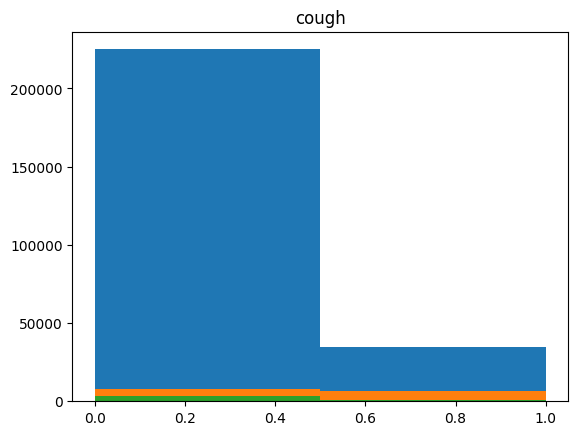

fever


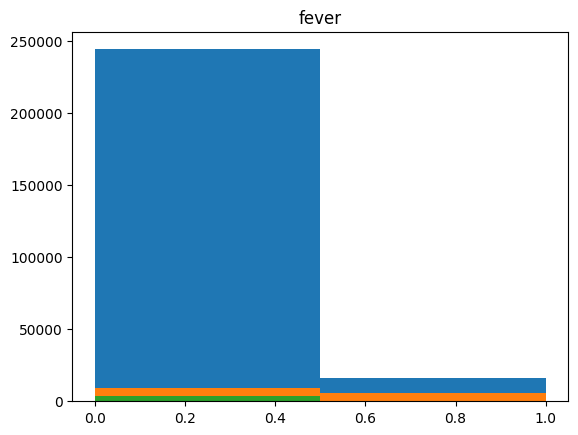

sore_throat


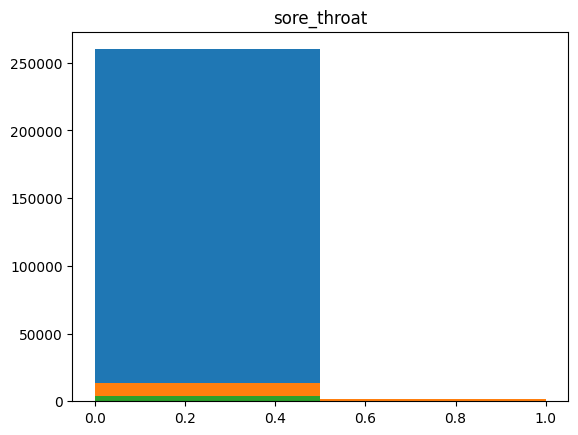

shortness_of_breath


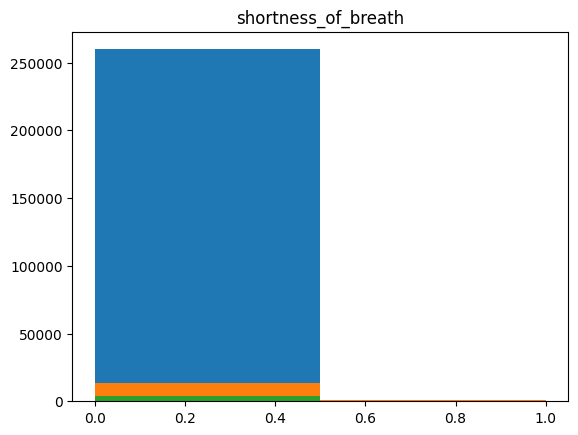

head_ache


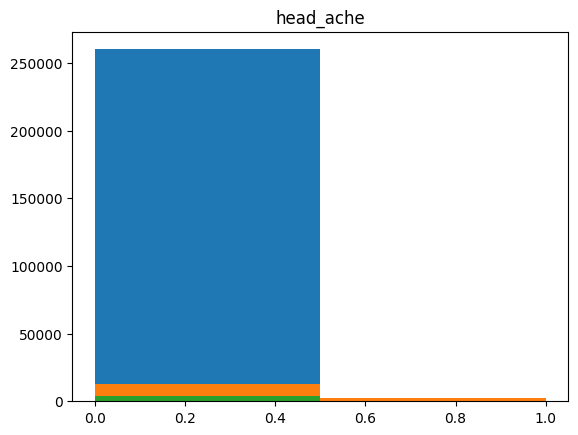

corona_result
age_60_and_above


TypeError: 'value' must be an instance of str or bytes, not a float

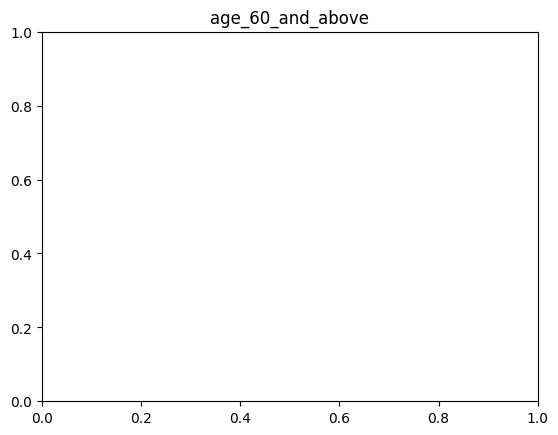

In [72]:
for c in data.columns[1:]:
    print(c)
    if c == 'corona_result':
        pass
    else:
        plt.title(c)
        for a in data.corona_result.unique():
            plt.hist(data[data.corona_result == a][c], bins = 2)
        plt.show()
    